<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/MCS_and_Bertrands_Paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets have some fun with the Bertrands Paradox and Monte Carlo Simulations

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [153]:
# distance function
def dist(x,y):
  return(np.sqrt((y[0]-x[0])**2 + (y[1]-x[1])**2))

# length of the side of the equilateral triangle
equi_len = 2*np.sqrt(3)/2

#Method 1:

Since the circle has infinite rotational symmetry, we can choose one endpoint for our chord without loss of generality (as a point on the circle can be transformed into any other point via a rotation). Then, by randomly selecting the other endpoint, we can define a chord between the two points. If this chord is within θ  of horizontal, it will pass through the smaller circle. The total range of angles possible is 180 degrees and only chords passing through 2θ of this range pass through the center circle so probability $ = \frac{2\theta}{180}$. But $sin(θ) = \frac{r}{R}$. Therefore,
$$Probability = \frac{2arcsin\frac{r}{R}}{180} $$
If the smaller circle were to be inscribed as an incircle to an equilateral triangle and the bigger circle were the circumcircle of the same equilateral triangle, then:
$$\frac{r}{R} = sin(30) = \frac{1}{2}$$ Then,
$$Probability =\frac{1}{3}$$
.......................................................................................
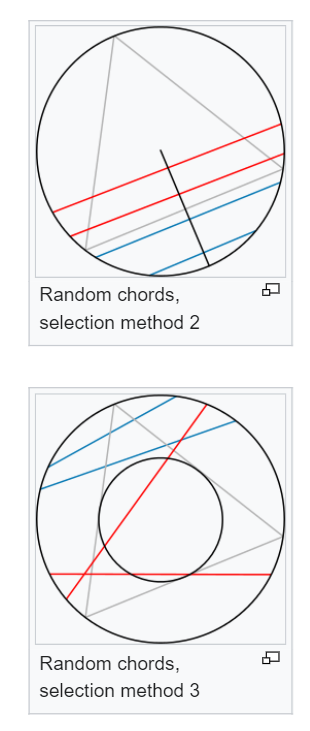...............................................................................


In [154]:
# check if a point is farther away from (0,1) by more than equi_len
def large(x):
  return (dist(x,(1,0)) > equi_len )

points = []
xlist, ylist = [], []
num_points = 10**6

for i in range(num_points):
  rand = random.random()
  x = (np.cos(2*np.pi*rand), np.sin(2*np.pi*rand))
  xlist.append(x[0])
  ylist.append(x[1])
  points.append(x)

ctr = 0
for x in points:
  if large(x):
    ctr+=1

print("probability =", ctr/num_points)

probability = 0.332603


#Method 2: Use the picture above
We can look only at chords parallel to the y-axis. Then for $θ = 30$,
$$ probability = \frac{r}{R} = \frac{1}{2}$$
Here we choose uniformly distributed midpoints of the chords in the segment joining (0,0) and (1,0)

In [210]:
points = []
mid_points = []
xlist, ylist = [], []
num_points = 1000000

for i in range(num_points):
  rand = random.uniform(0,1)
  x = (rand, np.sin(np.arccos(rand)))
  xlist.append(x[0])
  ylist.append(x[1])
  points.append(x)

ctr = 0
for x in points:
  if dist(x,(x[0],-x[1])) > equi_len:
    ctr+=1


print("probability =", ctr/num_points)

probability = 0.500272


As you can see below, the distribution of the midpoints of all the chords would instead look like that.

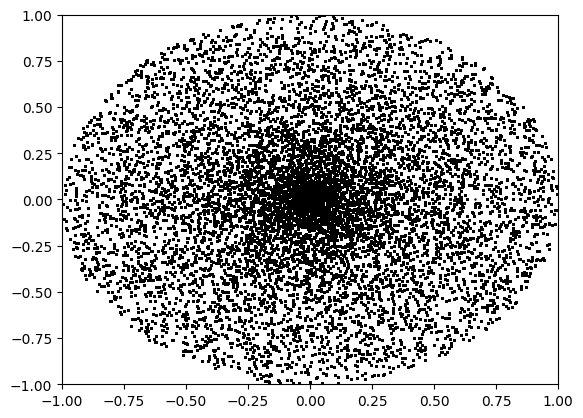

In [208]:
def rotate(p, theta):
  dist = np.sqrt(p[0]**2 + p[1]**2)
  return((dist*np.cos(theta), dist*np.sin(theta)))

points = []
mid_points = []
xlist, ylist = [], []
num_points = 10

div = np.linspace(0, 2*np.pi, 1000)

for j in div:
  for i in range(num_points):
    rand = random.uniform(0,1) # a random point in the segment (0,1)
    rot = rotate((rand,0),j) #rotation by div[j]
    points.append(rot)
    plt.scatter([x[0] for x in points],[x[1] for x in points], s =0.5, color = 'black')
    plt.xlim(-1,1)
    plt.ylim(-1,1)

In [200]:
rotate((1,0),3.14/2)

(0.0007963267107332633, 0.9999996829318346)

#Method 3: Use the picture above
We wish to randomly select a point uniformly within a $Γ((0,0),1)$. (For that we randomly select a r between 0 and 1 and randomly select a theta between 0 and $2π$. But does this random selection matter ?) Then we check, among these chords uniquely idenfied by the points how many of them lie inside the incircle? because those chords will have a length longer than the side of the equilateral triangle

probability = 0.25073


Text(0, 0.5, 'theta')

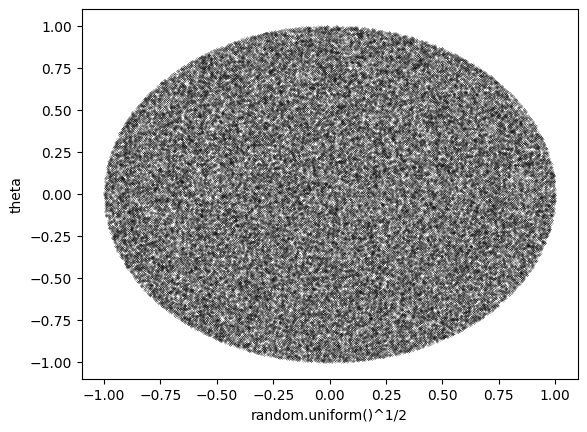

In [176]:
def check_large(x):
  return(2*np.sqrt(1-x[0]**2-x[1]**2)) > equi_len

rand_points = []
num_points = 100000
for _ in range(num_points):
  r = (random.uniform(0,1))**(1/2)
  theta = random.uniform(0, 2*np.pi)
  rand_points.append((r*np.cos(theta),r*np.sin(theta)))

count = 0
for x in rand_points:
  if check_large(x):
    count+=1
print("probability =", count/num_points)
plt.scatter([x[0] for x in rand_points],[x[1] for x in rand_points], s= 0.02, color = 'black')
plt.xlabel("random.uniform()^1/2")
plt.ylabel("theta")

Note that, if we simply choose $r = uniform.random()$ or $r = uniform.random()^\frac{1}{4}$, then we get different different distributions for the midpoints of the chords. But this would be correct still, but wrong given the above mentioned interpretation of Method 3. The probabilities thus changes from 0.25 to 0.5 and 0.06 respectively. Note that the distribution for r ~ $random.uniform ^ \frac{1}{1}$ seems similar with the distribution in method 2 above, which results in the same probability of $0.5$

probability = 0.50189


Text(0, 0.5, 'theta')

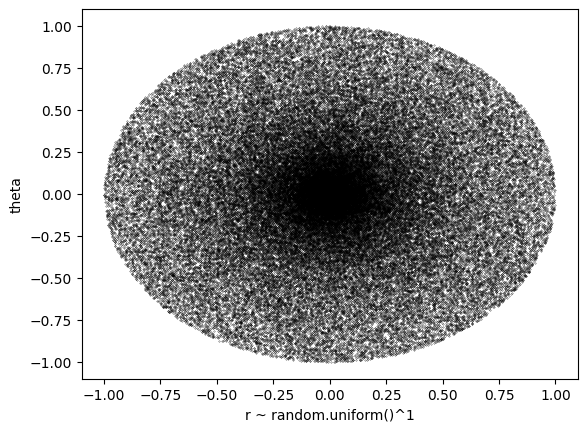

In [181]:
rand_points = []
num_points = 100000
for _ in range(num_points):
  r = (random.uniform(0,1))**(1)
  theta = random.uniform(0, 2*np.pi)
  rand_points.append((r*np.cos(theta),r*np.sin(theta)))

count = 0
for x in rand_points:
  if check_large(x):
    count+=1
print("probability =",count/num_points)
plt.scatter([x[0] for x in rand_points],[x[1] for x in rand_points], s= 0.05, color = 'black')
plt.xlabel("r ~ random.uniform()^1")
plt.ylabel("theta")

Probability = 0.06211


Text(0, 0.5, 'theta')

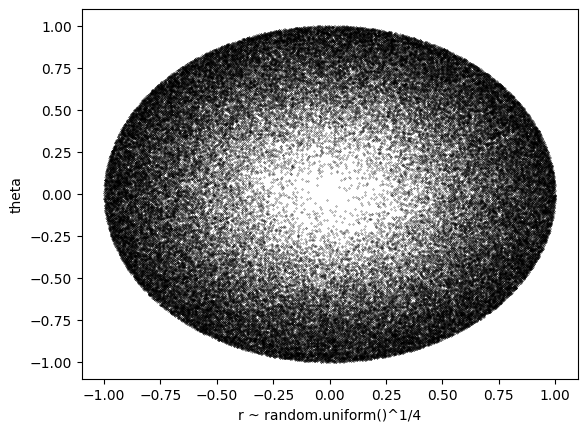

In [182]:
rand_points = []
num_points = 100000
for _ in range(num_points):
  r = (random.uniform(0,1))**(1/4)
  theta = random.uniform(0, 2*np.pi)
  rand_points.append((r*np.cos(theta),r*np.sin(theta)))

count = 0
for x in rand_points:
  if check_large(x):
    count+=1
print("Probability =", count/num_points)
plt.scatter([x[0] for x in rand_points],[x[1] for x in rand_points], s= 0.05, color = 'black')
plt.xlabel("r ~ random.uniform()^1/4")
plt.ylabel("theta")